In [8]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import igraph as ig
import networkx as nx
#from community import *
%matplotlib inline
from math import pi

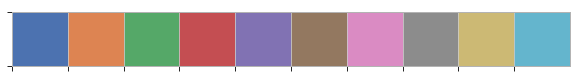

In [9]:
# style
sns.set_style("whitegrid", {'xtick.bottom': True, 'ytick.left': True, 
                            'font.family': ['Liberation Sans'], 'axes.edgecolor': '0.7',
                            'grid.color': '.8'})
sns.set_context('paper')

flatui = ["#44bfaa","#9b59b6", "#e74c3c", "#34495e", "#3498db", "#95a5a6"]
flatui_original = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ["windows blue",  "faded green" ,"dusty purple", "faded red", "dark yellow", "greyish"]

sns.set_palette('deep')
sns.palplot(sns.color_palette())

colors= sns.color_palette()

In [10]:
def set_ticks_font(size = 11):
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)

def set_label_size(ax, size = 13):
    ax.xaxis.label.set_size(size)
    ax.yaxis.label.set_size(size)
    
def set_legend_format(ax, size = 11):
    ax.legend(fontsize = size, frameon = True, markerscale = 1)

def set_grid(ax):
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

## Medidas de todas as redes

In [4]:
# endereço das redes

paths = sorted(glob.glob('k_3/networks/100/mu*[0-6]/net*/net*'))

In [5]:
# fazer lista de redes
# igraph

networks = []

for network in paths:
    
    try:
        g= ig.read(network)
        g.delete_vertices(0)
        networks.append(g)

    except: 
        g= ig.read(network, 'pajek')
        networks.append(g)
        

In [6]:
networks = []

for network in paths:
    
    try:
        g=nx.read_edgelist(network)
        networks.append(g)

    except: 
        g= nx.read_pajek(network)
        g = nx.Graph(g)
        networks.append(g)

In [7]:
algebraic_connectivity = []

for network in networks:
    av = round(nx.algebraic_connectivity(network, normalized=True),5)
    algebraic_connectivity.append(av)

In [42]:
medidas_2 = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0, usecols = [0,1,2]).drop(['mu01/net11', 'mu01/net13','mu01/net32', 'mu01/net33']+[i for i in list(medidas.index) if i[2:4] == '07'] )
medidas_2 = medidas_2.sort_index()
medidas_2['alg_conn'] = algebraic_connectivity

medidas_2['av_clus'] = list(map(nx.average_clustering, networks))

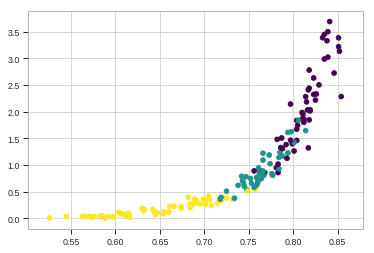

In [51]:
#plt.scatter(medidas_2['Q'], (medidas_2['av_clus']),c = 'r')
#plt.scatter(medidas_2['Q'], (medidas_2['OP']),c = 'b')
plt.scatter(medidas_2['Q'], (medidas_2['av_clus'])/medidas_2['OP'],c = medidas['clusters'], cmap='viridis')


# Começo de verdade

In [4]:
def normalizar_range(x):
    y = (x - np.min(x))/(np.max(x) - np.min(x))
    return y

def normalizar_std(x):
    y = (x - np.mean(x))/np.std(x)
    return y

In [5]:
def ordem_ids_clusters(x):
    x1 = 0
    if x == 1:
        x1 = 2
    if x == 2:
        x1 = 1
    
    return x1
    

### Códigos dos clusters

In [6]:
# clusters_HC = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
#        2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
#        1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0,
#        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
#        1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
#        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#clusters_HC = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
#       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
#       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
#       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
#       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
#       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
#       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

#clusters_HC = list(map(ordem_ids_clusters, clusters_HC))

clusters_SC = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

clusters_KM = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2,
        2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1,
        1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
clusters_KM = list(map(ordem_ids_clusters, clusters_KM))

In [11]:
# modularidade 

medidas = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0, usecols = [0,1])
medidas['clusters'] = clusters_KM

df_main5 = medidas = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0)

#drop = [i for i in list(medidas.index) if i[2:4] == '07'] + ['mu01/net32', 'mu01/net33']
#medidas = medidas.drop(drop).sort_index()

### Carregar histogramas bruteforce

In [12]:
files_bruteforce_results = sorted(glob.glob("k_3/networks/100/mu*/net*/gcn5*"))

bf_df = pd.DataFrame({}, index = range(1,96))

cols = sorted(np.loadtxt("k_3/networks/results/data_100_5.csv", delimiter=',', skiprows=1, usecols=0, dtype=str))

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=95,dtype=int)
    bf_df[cols[i]] = x
    
x=((bf_df.sum(axis=0))-75287520.0)
x = x[x!=0].index
#x = x[x==1.0]
bf_df = bf_df.transpose()
bf_df[95].loc[x] = bf_df[95].loc[x] - 1
bf_df = bf_df.transpose()

### Separação dos clusters

In [10]:
networks0 = ['mu06/net03', 'mu06/net08', 'mu05/net03', 'mu06/net05', 'mu06/net13', 'mu06/net12', 'mu05/net06', 'mu06/net07', 'mu05/net08', 'mu06/net01', 'mu05/net05', 'mu05/net01', 'mu06/net11', 'mu06/net10', 'mu06/net02', 'mu06/net04', 'mu04/net02', 'mu05/net04', 'mu05/net02', 'mu05/net10', 'mu06/net06', 'mu05/net07', 'mu05/net09', 'mu04/net01', 'mu06/net09', 'mu04/net04', 'mu04/net18', 'mu04/net11', 'mu04/net08', 'mu04/net05', 'mu04/net17', 'mu04/net07', 'mu04/net15', 'mu04/net10', 'mu04/net03', 'mu04/net16', 'mu04/net06', 'mu04/net13', 'mu04/net12', 'mu04/net14', 'mu04/net09', 'mu03/net08', 'mu03/net20', 'mu03/net15', 'mu03/net16', 'mu03/net14', 'mu03/net12', 'mu03/net13', 'mu07/net22', 'mu03/net04', 'mu07/net24', 'mu03/net05', 'mu07/net25', 'mu03/net10', 'mu03/net21', 'mu07/net09', 'mu03/net06', 'mu03/net19', 'mu03/net01', 'mu03/net07', 'mu07/net04', 'mu07/net18', 'mu07/net19', 'mu03/net09', 'mu07/net27', 'mu03/net11', 'mu07/net20', 'mu07/net29', 'mu03/net03', 'mu07/net17', 'mu07/net39', 'mu03/net18', 'mu02/net48', 'mu07/net13', 'mu07/net14', 'mu02/net12']
networks1 = ['mu07/net21', 'mu03/net17', 'mu03/net02', 'mu07/net10', 'mu07/net11', 'mu07/net15', 'mu07/net12', 'mu03/net24', 'mu07/net23', 'mu07/net30', 'mu07/net26', 'mu07/net16', 'mu03/net23', 'mu07/net08', 'mu03/net22', 'mu02/net43', 'mu02/net47', 'mu02/net44', 'mu02/net09', 'mu07/net28', 'mu02/net15', 'mu02/net29', 'mu02/net30', 'mu02/net31', 'mu02/net45', 'mu02/net46', 'mu02/net23', 'mu02/net50', 'mu02/net51', 'mu02/net49', 'mu02/net08', 'mu02/net04', 'mu02/net14', 'mu02/net07', 'mu02/net02', 'mu02/net06', 'mu02/net37', 'mu02/net42', 'mu02/net35', 'mu02/net19', 'mu02/net36', 'mu02/net11', 'mu02/net03', 'mu02/net41', 'mu07/net07', 'mu02/net34', 'mu02/net16', 'mu02/net39', 'mu02/net17', 'mu02/net38', 'mu02/net10', 'mu02/net24', 'mu02/net20', 'mu02/net21', 'mu07/net36', 'mu01/net29', 'mu02/net25', 'mu02/net27', 'mu02/net18', 'mu02/net28', 'mu01/net27', 'mu01/net18', 'mu01/net14', 'mu02/net26', 'mu02/net13', 'mu02/net32', 'mu01/net06', 'mu01/net16', 'mu02/net22', 'mu01/net25', 'mu01/net19', 'mu01/net24', 'mu07/net34', 'mu01/net07']
networks2 = ['mu02/net01', 'mu02/net40', 'mu02/net33', 'mu07/net05', 'mu01/net05', 'mu01/net15', 'mu01/net23', 'mu01/net28', 'mu01/net30', 'mu01/net09', 'mu07/net33', 'mu01/net10', 'mu01/net26', 'mu01/net20', 'mu01/net17', 'mu01/net02', 'mu01/net01', 'mu01/net08', 'mu01/net31', 'mu07/net03', 'mu01/net04', 'mu01/net03', 'mu07/net31', 'mu07/net35', 'mu01/net22', 'mu07/net01', 'mu07/net38', 'mu01/net12', 'mu07/net02', 'mu07/net06', 'mu07/net32', 'mu07/net37', 'mu00/net06', 'mu00/net11', 'mu01/net21', 'mu00/net07', 'mu00/net08', 'mu00/net09', 'mu00/net10', 'mu00/net03', 'mu00/net04', 'mu00/net02', 'mu00/net01', 'mu00/net05']

In [45]:
networks0 = list(medidas[medidas.clusters == 0].index)
networks1 = list(medidas[medidas.clusters == 1].index)
networks2 = list(medidas[medidas.clusters == 2].index)

In [ ]:
networks0 = list(medidas[medidas.Q < 0.70].index)
networks1 = list(medidas[medidas.Q >= 0.70][medidas.Q <= 0.78].index)
networks2 = list(medidas[medidas.Q >= 0.78].index)

In [72]:
networks0 = list(medidas.iloc[:64].index)
networks1 = list(medidas.iloc[64:128].index)
networks2 = list(medidas.iloc[128:].index)

In [13]:
networks0 = list(medidas[medidas.Q<=0.57+0.1].index)
networks1 = list(medidas[medidas.Q>0.57+0.1][medidas.Q<(0.57+0.2)].index)
networks2 = list(medidas[medidas.Q>(0.57+0.2)].index)

/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
prob_0 = bf_df[networks0]
prob_0 = prob_0.mean(axis=1).cumsum()/sum(prob_0.mean(axis=1))
prob_1 = bf_df[networks1]
prob_1 = prob_1.mean(axis=1).cumsum()/sum(prob_1.mean(axis=1))
prob_2 = bf_df[networks2]
prob_2 = prob_2.mean(axis=1).cumsum()/sum(prob_2.mean(axis=1))


In [15]:
q0 = round(medidas.loc[networks0].mean()['Q'],2)
q1 = round(medidas.loc[networks1].mean()['Q'],2)
q2 = round(medidas.loc[networks2].mean()['Q'],2)

std0 = round(medidas.loc[networks0].std()['Q'],2)
std1 = round(medidas.loc[networks1].std()['Q'],2)
std2 = round(medidas.loc[networks2].std()['Q'],2)

labels = [str(q0) + r' $\pm$ ' + str(std0), str(q1) + r' $\pm$ ' + str(std1), str(q2) + r' $\pm$ ' + str(std2)]

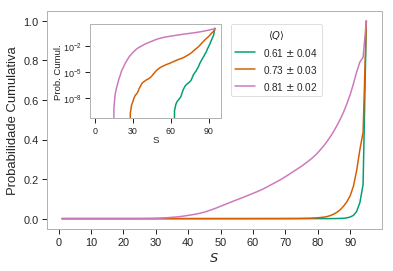

In [149]:
fig, ax = plt.subplots()
ax.plot(prob_0, label = labels[0] , lw = 1.5, c = sns.color_palette()[2])
ax.plot(prob_1, label = labels[1], lw = 1.5, c = sns.color_palette()[3])
ax.plot(prob_2, label = labels[2], lw = 1.5, c = sns.color_palette()[4])
#ax.set_yscale('log')
ax.set_xlabel(r'$S$')
ax.set_ylabel('Probabilidade Cumulativa')

plt.xticks(np.arange(0,100,10), np.arange(0,100,10), fontsize = 15)

ax.grid(False)
set_label_size(ax)

ax.legend(fontsize = 10, frameon = True, markerscale = 1, title = r'$\langle Q \rangle$', 
          title_fontsize = 10, loc=[0.55,0.61])

set_ticks_font()

axin = ax.inset_axes([0.13, 0.51, 0.39, 0.43])
axin.plot(prob_0, label = str(round(q0.mean(),2)), lw = 1.5, c = sns.color_palette()[2])
axin.plot(prob_1, label = str(round(q1.mean(),2)), lw = 1.5, c = sns.color_palette()[3])
axin.plot(prob_2, label = str(round(q2.mean(),2)), lw = 1.5, c = sns.color_palette()[4])
axin.set_yscale('log')
axin.grid(False)
axin.tick_params(axis = 'y',labelsize=9)
axin.set_xticks(np.arange(0,101, 30))
axin.set_ylabel('Prob. Cumul.', labelpad=0)
axin.set_xlabel('S', labelpad=0)
set_ticks_font()

#fig.savefig('figs_dissertacao/overleaf/prob_cumulativa_inset_div3.png', dpi=300)

### Quartis

In [46]:
quarter = 75287520*0.25
for i,n in enumerate(bf_df[networks0].mean(axis=1).cumsum()):
    if n > quarter:
        print(i-1, oldn, i, n)
        break
    oldn = n

93 13003256.564102564 94 75287520.0


In [168]:
nomes = list(df_main5.loc[networks1][df_main5.OP < 0.5].index)
#max(bf_df[nomes].mean(axis=1).cumsum()[:50])/max(bf_df[nomes].mean(axis=1).cumsum())

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4.9106291575162906e-05

In [179]:
(bf_df[df_main5.loc[networks2][df_main5.OP <= 0.5].index].mean(axis=1).cumsum()/7.528752e+07)[50]

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.06258541144115805

In [243]:
# pegar do R


medidas_R = pd.read_csv('k_3/networks/results/ci_bet_degree_100.dat', index_col = 0, sep= ' ')
medidas_R_op = pd.read_csv('k_3/networks/results/ci_bet_degree_op_100.dat', index_col = 0, sep= ' ')

In [244]:
# concatenar com modularidade

#drop = ['mu01/net11', 'mu01/net13']

medidas_todas = pd.concat([medidas, medidas_R],axis=1,sort=False)
medidas_op = pd.concat([medidas, medidas_R_op],axis=1,sort=False)

In [251]:
medidas_todas['clusters'] = clusters_HC
medidas_op['clusters'] = clusters_HC

In [205]:
# normalizadas e selecionar cluster

c = 2.0

df_todas = normalizar_range(medidas_todas[medidas_todas['clusters'] == c].drop(['clusters'],axis=1))
df_op = normalizar_range(medidas_op[medidas_op['clusters'] == c].drop(['clusters'],axis=1))

# sem as redes mu00

# df_todas2 = df_todas.drop([i for i in list(df_todas.index) if i[2:4] == '00'])
# df_op2 = df_op.drop([i for i in list(df_op.index) if i[2:4] == '00'])

In [206]:
# preparar pra plot -> médias

df = round(pd.concat([df_op.mean(), df_todas.mean()], axis=1),4)

df.columns = ['op', 'todas']

In [207]:
# transpor, selecionar medidas pro plot

df = df.T
categories=list(df)[1:]
N = len(categories)

In [208]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

In [26]:
# "dimensão" do plot

values = df.loc['op'][1:].tolist()
values += values[:1]

values2 = df.loc['todas'][1:].tolist()
values2 += values2[:1]

                   op   todas
Q              0.5695  0.5695
CI.scores      0.4536  0.3564
bet.scores     0.5062  0.4895
degree.scores  0.4724  0.3819
                   op   todas
Q              0.4668  0.4668
CI.scores      0.2490  0.2614
bet.scores     0.3088  0.3003
degree.scores  0.4286  0.4962
                   op   todas
Q              0.5654  0.5654
CI.scores      0.4439  0.3184
bet.scores     0.6960  0.4887
degree.scores  0.5784  0.3135


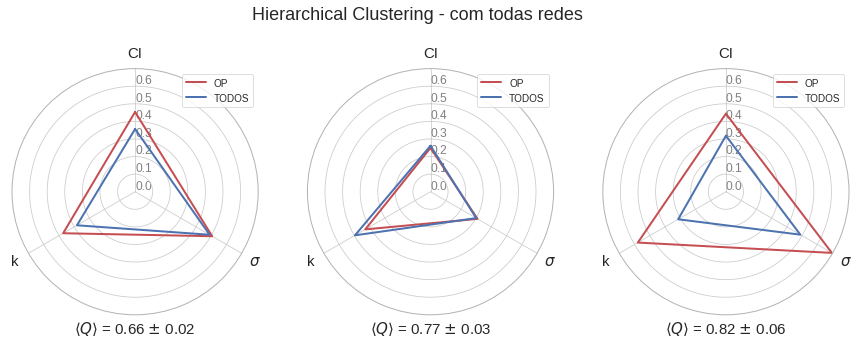

In [252]:
# PLOT 3 CLUSTERS

fig = plt.figure(figsize=(15,10))

id_c = [0.0,1.0,2.0]

mean_q = list(medidas_todas.groupby('clusters').mean().sort_values('Q').round(2)['Q'])
std_q = list(medidas_todas.groupby('clusters').std().sort_values('Q').round(2)['Q'])


for i, c in enumerate(id_c):
    
    df_todas = normalizar_range(medidas_todas[medidas_todas['clusters'] == c].drop(['clusters'],axis=1))
    df_op = normalizar_range(medidas_op[medidas_op['clusters'] == c].drop(['clusters'],axis=1))
    
    df_todas = df_todas.drop([i for i in list(df_todas.index) if i[2:4] == '00'])
    df_op = df_op.drop([i for i in list(df_op.index) if i[2:4] == '00'])
    
    df = round(pd.concat([df_op.mean(), df_todas.mean()], axis=1),4)
    
    df.columns = ['op', 'todas']
    
    print(df)
    
    df = df.T
    categories=['CI', r'$\sigma$', 'k']
    N = len(categories)
    
    values = df.loc['op'][1:].tolist()
    values += values[:1]
    
    values2 = df.loc['todas'][1:].tolist()
    values2 += values2[:1]
    
    if i == 0:
        ax = fig.add_subplot(1,len(id_c),i+1, polar=True)
    else: 
        ax = fig.add_subplot(1,len(id_c),i+1, sharey=ax, polar=True)
        
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, fontsize = 15)
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0.0,0.7,0.1), np.round(np.arange(0.0,0.7,0.1),1), color="grey", size=12)
    plt.ylim(0,0.7)
    ax.plot(angles, values, linewidth=2, linestyle='solid',color=colors[3], label="OP")
#    ax.fill(angles, values, color = 'r', alpha=0.05)

    ax.plot(angles, values2, linewidth=2, linestyle='solid',color = colors[0],label="TODOS")
#    ax.fill(angles, values2, color = 'grey', alpha=0.2)
    
    ax.set_xlabel(r'$\langle Q \rangle$ = '+str(mean_q[i])+r' $\pm$ ' + str(std_q[i]), fontsize = 15)

    ax.legend(loc = 1, fontsize = 10)
    
#fig.suptitle('KMeans - sem redes modificadas', fontsize = 18, y = 0.76)
#fig.suptitle('Hierarchical Clustering - com todas redes', fontsize = 18, y = 0.76)

#fig.savefig('figs_dissertacao/sets_op/radar/radar_clusters_HC_07.png', dpi=300)

In [248]:
clusters_HC

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


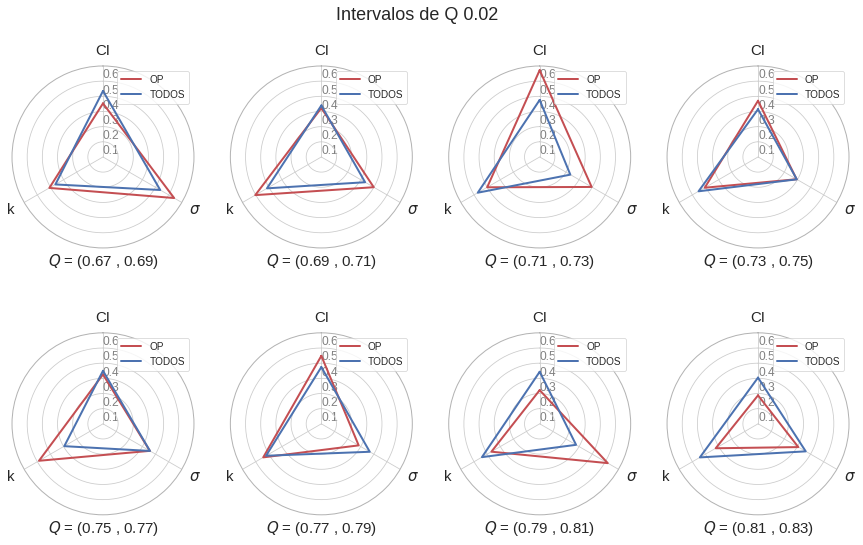

In [163]:
# PLOT BINS

fig = plt.figure(figsize=(15,9))

#intervalos = [[0.7,0.71],[0.71, 0.72],[0.72, 0.73],[0.73, 0.74],[0.74,0.75],[0.75,0.76],[0.76,0.77],[0.77,0.78],
#             [0.78,0.79],[0.79,0.8],[0.8,0.81],[0.81,0.82]]

#intervalos = [[0.71, 0.72],[0.72, 0.73],[0.73, 0.74],[0.74,0.75],[0.75,0.76],[0.76,0.77],[0.77,0.78],[0.78,0.79]]

intervalos = [[0.68,0.7],[0.70, 0.72],[0.72, 0.74],[0.74, 0.76],[0.76,0.78],[0.78,0.8],[0.8,0.82],[0.82,0.84]]

intervalos = list(map(lambda x: [x[0]-0.01, x[1]-0.01], intervalos))

for i, interv in enumerate(intervalos):
    
    df_todas = medidas_todas[medidas_todas['Q'] >= interv[0]][medidas_todas['Q'] <= interv[1]].drop(['clusters'],axis=1)
    df_op = medidas_op[medidas_op['Q'] >= interv[0]][medidas_op['Q'] <= interv[1]].drop(['clusters'],axis=1)
    
    mean_q = round(df_todas.mean()['Q'],2)
    std_q = round(df_todas.std()['Q'],2)
    
    df_todas = normalizar_range(df_todas)
    df_op = normalizar_range(df_op)

    
#    print(df_todas, df_op, mean_q, std_q)
    
#    df_todas = df_todas.drop([i for i in list(df_todas.index) if i[2:4] == '00'])
#    df_op = df_op.drop([i for i in list(df_op.index) if i[2:4] == '00'])
    
    df = round(pd.concat([df_op.mean(), df_todas.mean()], axis=1),4)

    df.columns = ['op', 'todas']
    
    df = df.T
    categories=['CI', r'$\sigma$', 'k']
    N = len(categories)
    
    values = df.loc['op'][1:].tolist()
    values += values[:1]
    
    values2 = df.loc['todas'][1:].tolist()
    values2 += values2[:1]
    
    if len(intervalos) > 4:
        
        ax = fig.add_subplot(2,4,i+1, polar=True)
    
    else:
        ax = fig.add_subplot(1,len(intervalos),i+1, polar=True)
        
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, fontsize = 15)
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0.0,0.7,0.1), np.round(np.arange(0.0,0.7,0.1),1), color="grey", size=12)
    plt.ylim(0.1,0.7)
    ax.plot(angles, values, linewidth=2, linestyle='solid',color=colors[3], label="OP")
#    ax.fill(angles, values, color = 'r', alpha=0.05)

    ax.plot(angles, values2, linewidth=2, linestyle='solid',color = colors[0],label="TODOS")
#    ax.fill(angles, values2, color = 'grey', alpha=0.2)
    
    ax.set_xlabel(r'$Q$ = ('+str(round(interv[0],2))+' , '+str(round(interv[1],2))+')', fontsize = 15)

    ax.legend(loc = 1, fontsize = 10)

fig.suptitle('Intervalos de Q 0.02', fontsize = 18, y = 0.94)
fig.savefig('figs_dissertacao/radar_Qmedio_sequencial2_002.png', dpi=300)

In [ ]:
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
#plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
#plt.ylim(0,40)
ax.plot(angles, values, linewidth=1, linestyle='solid', label="OP")
ax.fill(angles, values, 'b', alpha=0.1)

ax.plot(angles, values2, linewidth=1, linestyle='solid', label="TODOS")
ax.fill(angles, values2, 'r', alpha=0.1)

ax.legend()

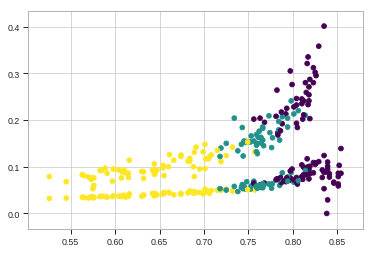

In [155]:
#plt.scatter(medidas_op['Q'], medidas_op['bet.scores'], c = medidas['clusters'], cmap='viridis')
plt.scatter(medidas_todas['Q'], medidas_op['bet.scores'], c = medidas['clusters'], cmap='viridis')
plt.scatter(medidas_todas['Q'], medidas_todas['bet.scores'], c = medidas['clusters'], cmap='viridis')
#plt.scatter(medidas_todas['Q'], medidas_op['CI.scores']/medidas_todas['CI.scores'], c = medidas['clusters'], cmap='viridis')

In [117]:
medidas.drop([i for i in list(medidas.index) if i[2:4] == '00'])[medidas['Q'] > 0.83][medidas['Q']< 0.84]
#medidas['clusters'].drop([i for i in list(medidas.index) if i[2:4] == '00']).value_counts() 

/home/usuario/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Q,clusters
names,,
mu00/net06,0.833,0
mu00/net07,0.838,0
mu00/net08,0.839,0
mu00/net09,0.839,0
mu00/net11,0.835,0
mu01/net21,0.835,0


In [ ]:
# normalizadas e selecionar cluster

c = 2.0

df_todas = normalizar_range(medidas_todas[medidas_todas['clusters'] == c].drop(['clusters'],axis=1))
df_op = normalizar_range(medidas_op[medidas_op['clusters'] == c].drop(['clusters'],axis=1))

# sem as redes mu00

df_todas2 = df_todas.drop([i for i in list(df_todas.index) if i[2:4] == '00'])
df_op2 = df_op.drop([i for i in list(df_op.index) if i[2:4] == '00'])